We are going to import an important library, before we start coding part

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import seaborn as sns

In [3]:
df= pd.read_csv('/content/drive/MyDrive/Project_2_Feynn_Lab/mcdonalds.csv')
df.shape

(1453, 15)

In [4]:
df.head(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,Once a month,Male


there are 1453 rows and 15 columns, as per this data we need to do grouping with k-means clustering method

In [5]:
 df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [7]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

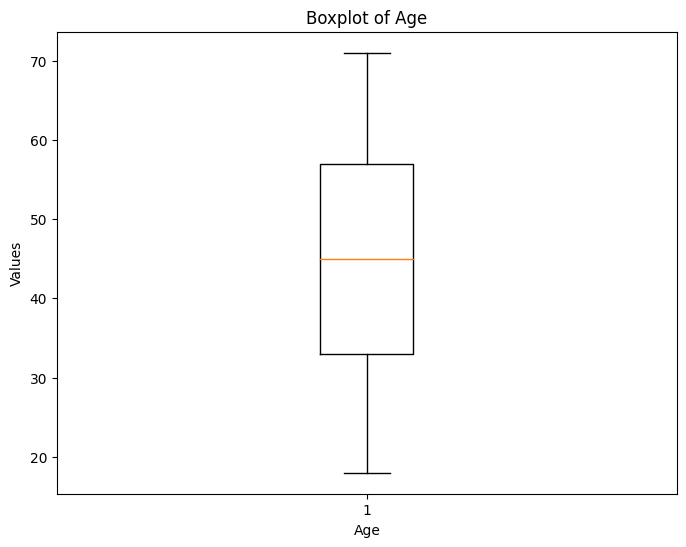

In [8]:
import matplotlib.pyplot as plt

# Create a boxplot for the 'Age' column
plt.figure(figsize=(8, 6))
plt.boxplot(df['Age'])
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.ylabel('Values')
plt.show()


no null values, in age clumn(numerical) no outliers or missing values

let's check unique values in non-numeric columns

In [9]:
df['VisitFrequency'].unique()

array(['Every three months', 'Once a week', 'Once a month', 'Once a year',
       'More than once a week', 'Never'], dtype=object)

In [10]:
df['Like'].unique()

array(['-3', '2', '1', '4', 'I love it!+5', 'I hate it!-5', '-2', '3',
       '0', '-4', '-1'], dtype=object)

In [11]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

now we are going to  do some changes into 'Like', 'Gender', 'VisitFrequency' columns

In [12]:
# Replace values in the 'Like' column
df['Like'] = df['Like'].replace({'I love it!+5': '5', 'I hate it!-5': '-5'})

# Convert the 'Like' column to numeric
df['Like'] = pd.to_numeric(df['Like'])

# Verify the changes
print(df['Like'].unique())


[-3  2  1  4  5 -5 -2  3  0 -4 -1]


In [13]:
#Replace Gender Column's Values
df['Gender'] = df['Gender'].replace({'Female':'0','Male':'1'})

#change the column type
df['Gender'] = pd.to_numeric(df['Gender'])

#check the changes
print(df['Gender'].unique())

[0 1]


In [14]:
#mapping
mapping = {
    'Every three months': 1,
    'Once a week': 4,
    'Once a month': 3,
    'Once a year': 0.5,
    'More than once a week': 5,
    'Never': 0
}

# Replace values in the 'VisitFrequency' column
df['VisitFrequency'] = df['VisitFrequency'].replace(mapping)

#change the column type
df['VisitFrequency'] = pd.to_numeric(df['VisitFrequency'])

#check the changes
print(df['VisitFrequency'].unique())

[1.  4.  3.  0.5 5.  0. ]


In [15]:
df.head(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,1.0,0
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,1.0,0
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,1.0,0
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,4.0,0
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,3.0,1


In [16]:
# Define mapping for 'Yes' and 'No'
mapping = {'Yes': 1, 'No': 0}

# Replace values in the specified columns
columns_to_replace = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
df[columns_to_replace] = df[columns_to_replace].replace(mapping)

# Check the updated DataFrame
print(df.head())

   yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0      0           1      0          1       0     1      1      0          1   
1      1           1      0          1       1     1      1      1          1   
2      0           1      1          1       1     1      0      1          1   
3      1           1      0          1       1     1      1      1          0   
4      0           1      0          1       1     1      1      0          0   

   healthy  disgusting  Like  Age  VisitFrequency  Gender  
0        0           0    -3   61             1.0       0  
1        0           0     2   51             1.0       0  
2        1           0     1   62             1.0       0  
3        0           1     4   69             4.0       0  
4        1           0     2   49             3.0       1  


In [17]:
df.head(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,1.0,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,1.0,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,1.0,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,4.0,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,3.0,1


Let's Do some EDA Process with graph and try to figure it put some-insights

<ipython-input-18-0585ac89f1b1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age', y='VisitFrequency', data=df, palette = 'hsv')


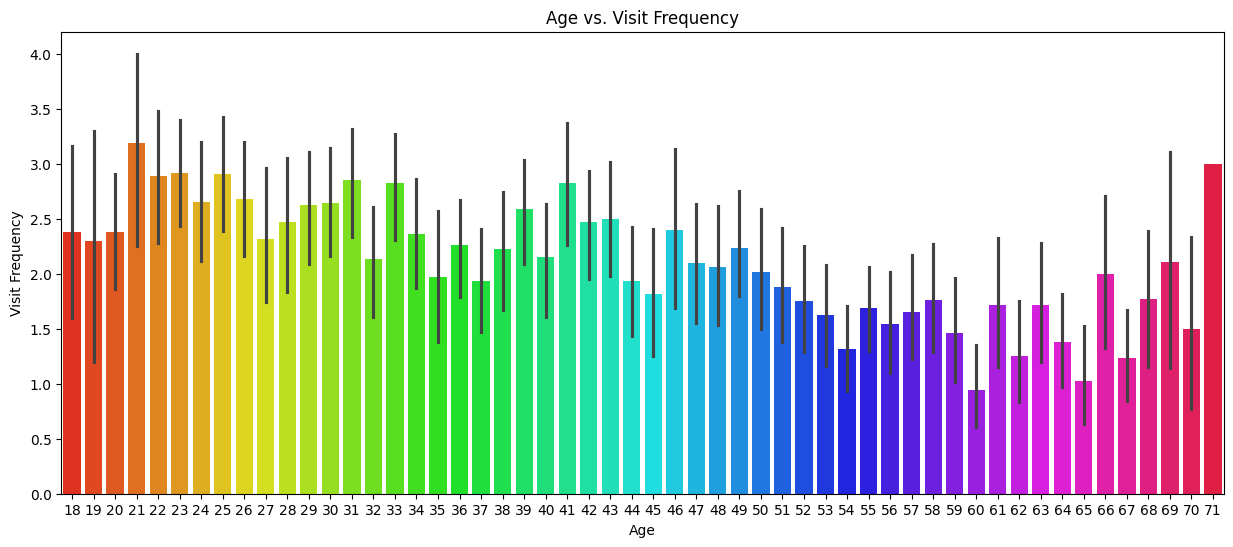

In [18]:
plt.figure(figsize=(15, 6))
sns.barplot(x='Age', y='VisitFrequency', data=df, palette = 'hsv')
plt.title('Age vs. Visit Frequency')
plt.xlabel('Age')
plt.ylabel('Visit Frequency')
plt.show()

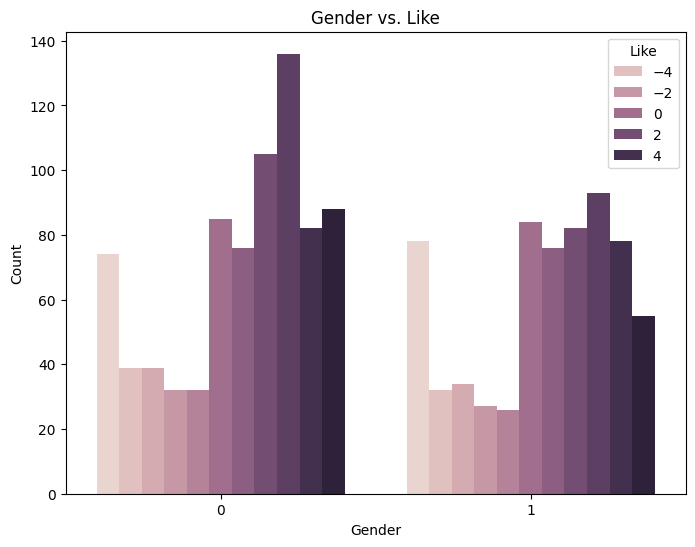

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Like', data=df)
plt.title('Gender vs. Like')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

FEMALE is BLUE, MALE is ORANGE

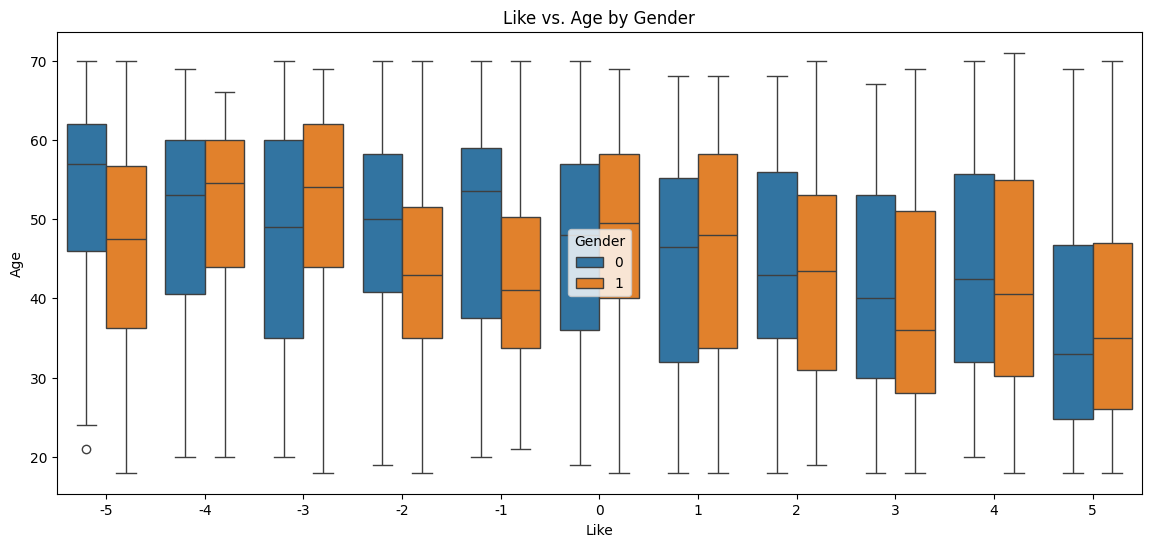

In [20]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Like', y='Age', hue='Gender', data=df)
plt.title('Like vs. Age by Gender')
plt.xlabel('Like')
plt.ylabel('Age')
plt.legend(title='Gender')
plt.show()

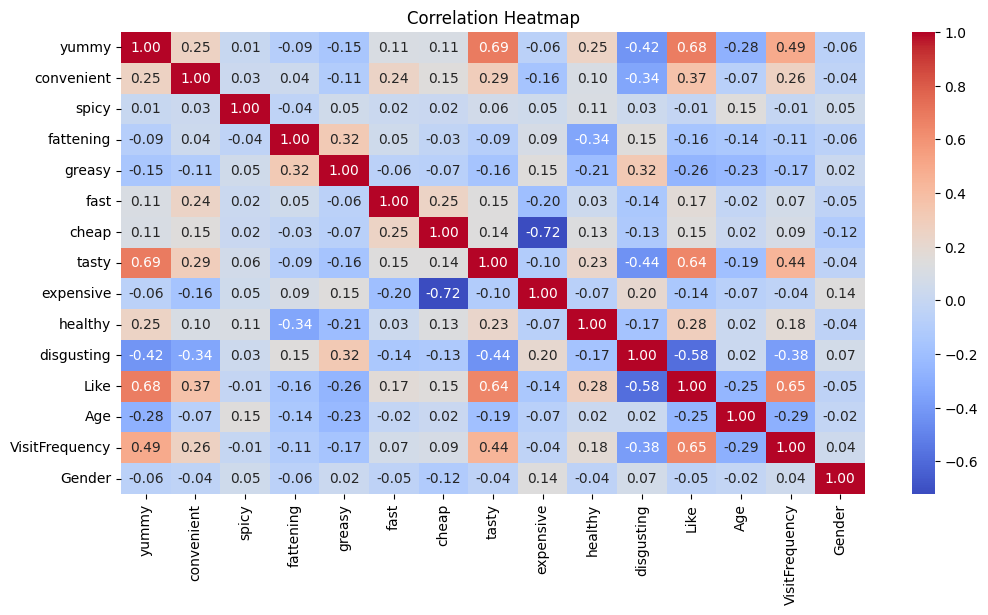

In [21]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Create heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## **Correlation** **Before** **Standardization**

In [34]:
# Add Customer_ID column with values from 1 to 1453
df['Customer_ID'] = range(1, 1454)


In [22]:
# we are scalling our data so model will not become bias

from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the DataFrame using MinMaxScaler
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Display the scaled DataFrame
print(df_scaled.head())


   yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0    0.0         1.0    0.0        1.0     0.0   1.0    1.0    0.0        1.0   
1    1.0         1.0    0.0        1.0     1.0   1.0    1.0    1.0        1.0   
2    0.0         1.0    1.0        1.0     1.0   1.0    0.0    1.0        1.0   
3    1.0         1.0    0.0        1.0     1.0   1.0    1.0    1.0        0.0   
4    0.0         1.0    0.0        1.0     1.0   1.0    1.0    0.0        0.0   

   healthy  disgusting  Like       Age  VisitFrequency  Gender  
0      0.0         0.0   0.2  0.811321             0.2     0.0  
1      0.0         0.0   0.7  0.622642             0.2     0.0  
2      1.0         0.0   0.6  0.830189             0.2     0.0  
3      0.0         1.0   0.9  0.962264             0.8     0.0  
4      1.0         0.0   0.7  0.584906             0.6     1.0  


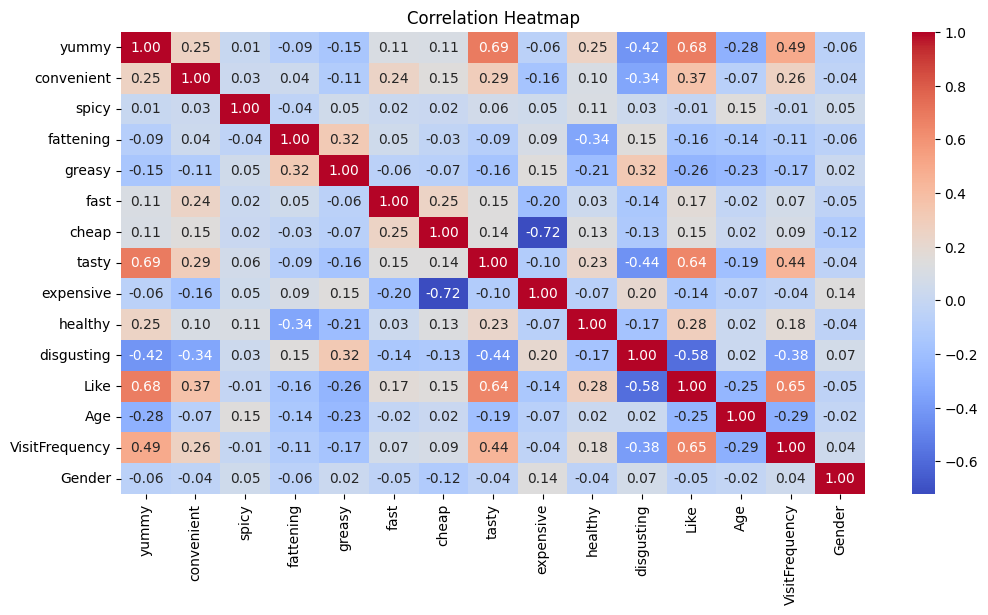

In [23]:
# Calculate correlation matrix
corr_matrix = df_scaled.corr()

# Create heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# **After scaling, it remains the same.**



# This means the effect is the same, but now we have scaled values in our data.

# **Now we are going to reduce number of columns via PCA Method**

In [24]:
from sklearn.decomposition import PCA

# Considering all 15 columns
selected_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy',
                    'fast', 'cheap', 'tasty', 'expensive', 'healthy',
                    'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']
x = df_scaled[selected_columns].values

# Apply PCA
pca = PCA(n_components=10)  # You can choose the number of components you want
pca_components = pca.fit_transform(x)

# Create a DataFrame to store the PCA components
pc_names = [f'pc{i}' for i in range(1, pca.n_components_ + 1)]
pca_df = pd.DataFrame(data=pca_components, columns=pc_names)


In [25]:
pca_df.head(5)

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,0.557224,-0.372288,0.537696,0.632298,-0.374995,0.186471,0.294342,-0.309892,0.194135,0.138864
1,-0.285292,0.245180,-0.744044,0.316979,-0.048011,0.025709,0.208423,0.072718,-0.007320,-0.048076
2,0.293742,0.588579,-0.134770,0.588722,0.733468,0.834098,0.989545,0.386850,0.227620,-0.141964
3,-0.345502,-0.376062,-0.827666,0.089599,0.210984,-0.591661,0.089135,0.017405,-0.192637,0.178687
4,0.217023,-0.582405,0.132671,-0.657195,0.475084,0.915105,-0.140414,-0.489222,0.265809,-0.099809


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

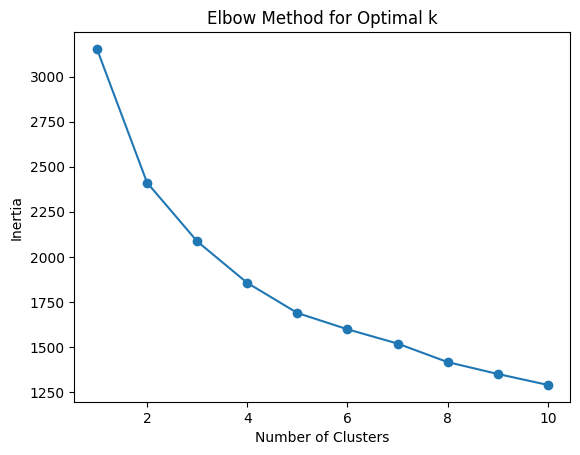

In [26]:
# first let's figure out how many times we will do cluster/grouping

from sklearn.cluster import KMeans

# Initialize an empty list to store inertia values
inertia = []

# Try different values of k
for k in range(1, 11):
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    # Append the inertia to the list
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# **as we can see 4 is the break point so we will divide our customers into 5 group**

In [32]:
from sklearn.cluster import KMeans

# Manual selection of number of clusters (e.g., 3 or 4)
num_clusters = 4

# Initialize KMeans with the selected number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit KMeans to the data
kmeans.fit(pca_df)

# Get cluster labels
cluster_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


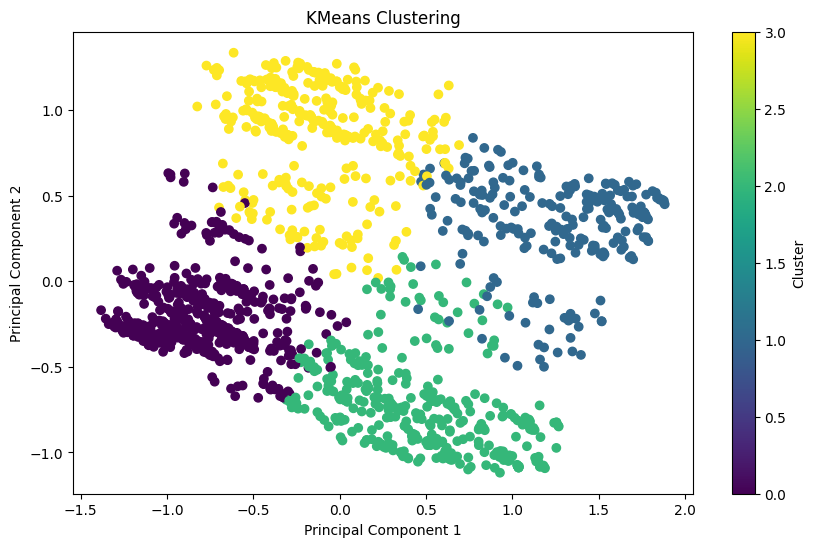

In [39]:
# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['pc1'], pca_df['pc2'], c=cluster_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering')
plt.colorbar(label='Cluster')
plt.show()

In [43]:
# Save to  Result of Clustering in CSV file
cluster_df.to_csv('/content/drive/MyDrive/Project_2_Feynn_Lab/cluster_Result.csv', index=False)

In [40]:
# Now, let's create a DataFrame to compare 'Customer_ID' with clustering groups
cluster_df = pd.DataFrame({'Customer_ID': df['Customer_ID'], 'Cluster_Labels': cluster_labels})

# Adjust pandas display settings to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


# Display the DataFrame
print(cluster_df)

      Customer_ID  Cluster_Labels
0               1               2
1               2               3
2               3               3
3               4               0
4               5               2
5               6               0
6               7               3
7               8               0
8               9               1
9              10               3
10             11               2
11             12               3
12             13               2
13             14               3
14             15               1
15             16               0
16             17               0
17             18               3
18             19               1
19             20               3
20             21               3
21             22               3
22             23               3
23             24               3
24             25               0
25             26               3
26             27               0
27             28               3
28            